# Distribution of empty runs in NYC

In [1]:
import setup

def distrct_amounts(df, direction):
    er_amount_bronx,er_amount_brooklyn,er_amount_manhatten,er_amount_queens,er_amount_staten_island = [],[],[],[],[]
    full_amount_bronx,full_amount_brooklyn,full_amount_manhatten,full_amount_queens,full_amount_staten_island = [],[],[],[],[]
    er_amount = df.loc[(df['passenger_count'] == 0)][direction].value_counts()
    full_amount = df[direction].value_counts()
    for key in er_amount.keys():
        if key in setup.bronx:
            er_amount_bronx.append(er_amount[key])
        elif key in setup.brooklyn: 
            er_amount_brooklyn.append(er_amount[key])
        elif key in setup.manhatten:
            er_amount_manhatten.append(er_amount[key])
        elif key in setup.queens: 
            er_amount_queens.append(er_amount[key])
        elif key in setup.staten_island:
            er_amount_staten_island.append(er_amount[key])
    for key in full_amount.keys():
        if key in setup.bronx:
            full_amount_bronx.append(full_amount[key])
        elif key in setup.brooklyn: 
            full_amount_brooklyn.append(full_amount[key])
        elif key in setup.manhatten:
            full_amount_manhatten.append(full_amount[key])
        elif key in setup.queens: 
            full_amount_queens.append(full_amount[key])
        elif key in setup.staten_island:
            full_amount_staten_island.append(full_amount[key])            
    return [sum(er_amount_bronx)/sum(full_amount_bronx), sum(er_amount_brooklyn)/sum(full_amount_brooklyn), sum(er_amount_manhatten)/sum(full_amount_manhatten), sum(er_amount_queens)/sum(full_amount_queens), sum(er_amount_staten_island)/sum(full_amount_staten_island)] 

def sum_up(year):
    amounts = setup.np.array([0.0,0.0,0.0,0.0,0.0])
    for month in year:
        amounts += setup.np.array(month)
    return amounts

def er_district_amounts_percentages(array):
    month_percentage = []
    for item in array:
        month_percentage.append(item / sum(array)*100)
    return month_percentage

def pu_manhatten(month):
    full_amount = month.loc[month.PULocationID.isin(setup.manhatten)]['PULocationID'].value_counts()
    er_amount = month.loc[(month.PULocationID.isin(setup.manhatten)) & (month['passenger_count'] == 0)]['PULocationID'].value_counts()
    return er_amount/full_amount

def do_manhatten(month):
    full_amount = month.loc[month.DOLocationID.isin(setup.manhatten)]['DOLocationID'].value_counts()
    er_amount = month.loc[(month.DOLocationID.isin(setup.manhatten)) & (month['passenger_count'] == 0)]['DOLocationID'].value_counts()
    return er_amount/full_amount

def percentage(month):
    return month / month.sum() * 100

def center(center):
    er_center = []
    for category in range(5): 
        tmp = center.loc[(center >= category)&(center < category+1)]
        tmp_list = []
        for key in tmp.keys():
            tmp_list.append(key)
        er_center.append(tmp_list)
    return er_center

def result_districts(er_percentages, er_year, title):
    print('-------------------- YEAR AVERAGE --------------------')
    print(er_percentages, '\n\n')
    for index in range(12):
        print('--------------------', setup.month_labels[index], '--------------------')
        print(er_district_amounts_percentages(er_year[index]), '\n')
    fig = setup.plt.figure(figsize =(10, 10))
    setup.plt.title(title)
    setup.plt.pie(er_percentages, colors=setup.district_colors)
    setup.plt.legend(setup.district_labels,loc=3)
    setup.plt.show()

def result_manhatten(manhatten):
    for index in range(5):
        print('---------- Category', index, '----------')
        print(center(manhatten/12)[index], '\n')

# PULocationID
#### Distribution of empty run starts per district of New York City

-------------------- YEAR AVERAGE --------------------
[25.608095995998468, 18.762740076654467, 18.596679217390328, 20.193979753043, 16.838504956913738] 


-------------------- JANUARY --------------------
[36.77923476662856, 15.996401476251274, 15.616128238831017, 14.48722715877182, 17.121008359517326] 

-------------------- FEBRUARY --------------------
[27.977142375965318, 13.444761389057195, 11.39220445746474, 11.523318133445915, 35.66257364406684] 

-------------------- MARCH --------------------
[25.69927586825561, 15.115991426776018, 13.629297405653078, 14.071384099234596, 31.484051200080703] 

-------------------- APRIL --------------------
[36.82010915830331, 20.10701716086076, 21.183379840934442, 21.88949383990149, 0.0] 

-------------------- MAY --------------------
[26.702072413731916, 17.31702296857269, 17.765092559601957, 19.48232171388728, 18.733490344206164] 

-------------------- JUNE --------------------
[24.514779715416076, 23.508461572728052, 24.607906360137218, 27.

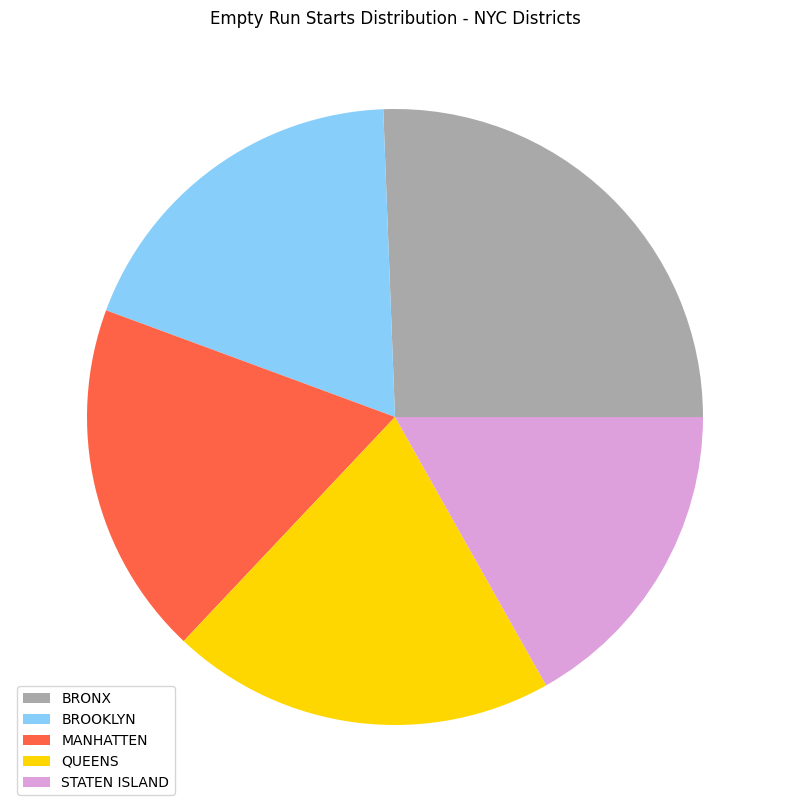

In [2]:
er_year_amounts = []
for month in setup.year:
    er_year_amounts.append(distrct_amounts(month, 'PULocationID')) 
result_districts(er_district_amounts_percentages(sum_up(er_year_amounts)), er_year_amounts, 'Empty Run Starts Distribution - NYC Districts')

#### Distribution of empty runs with the start in Manhatten

In [3]:
er_year_manhatten = []
for month in setup.year: 
    er_year_manhatten.append(pu_manhatten(month))
er_year_manhatten_percentages = []
for month in er_year_manhatten:
    er_year_manhatten_percentages.append(percentage(month))
er_manhatten_center = er_year_manhatten_percentages[0]
index = 1
for index in range(12):
    er_manhatten_center += er_year_manhatten_percentages[index]
result_manhatten(er_manhatten_center)

---------- Category 0 ----------
[] 

---------- Category 1 ----------
[4, 12, 13, 24, 41, 43, 45, 48, 50, 68, 74, 75, 79, 87, 88, 90, 100, 107, 113, 114, 116, 125, 127, 137, 140, 141, 142, 143, 144, 148, 151, 152, 158, 161, 162, 163, 164, 166, 170, 186, 202, 209, 211, 224, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 243, 244, 246, 249, 261, 262, 263] 

---------- Category 2 ----------
[42, 194] 

---------- Category 3 ----------
[] 

---------- Category 4 ----------
[] 



![](../assets/empty_pu.jpg?raw=true)

# DOLocationID
#### Distribution of empty run ends per district of New York City

-------------------- YEAR AVERAGE --------------------
[20.603302180783565, 19.910991337547554, 21.86528435346259, 22.497581655604037, 15.122840472602258] 


-------------------- JANUARY --------------------
[24.887255820305985, 20.14439512802393, 22.78847806720467, 23.188846789418573, 8.991024195046839] 

-------------------- FEBRUARY --------------------
[22.498390153241974, 19.800688229748747, 21.317462546771914, 22.411337529669932, 13.972121540567434] 

-------------------- MARCH --------------------
[22.30210683620309, 19.35908376717751, 20.772267307049226, 21.421555389620544, 16.144986699949627] 

-------------------- APRIL --------------------
[20.936218334431913, 18.188283271219603, 20.400703307723848, 21.751051296802377, 18.723743789822244] 

-------------------- MAY --------------------
[20.28123793771312, 18.4799659684256, 21.18855059913362, 22.038849705142912, 18.01139578958475] 

-------------------- JUNE --------------------
[19.14294821486734, 19.80965955543485, 22.56198

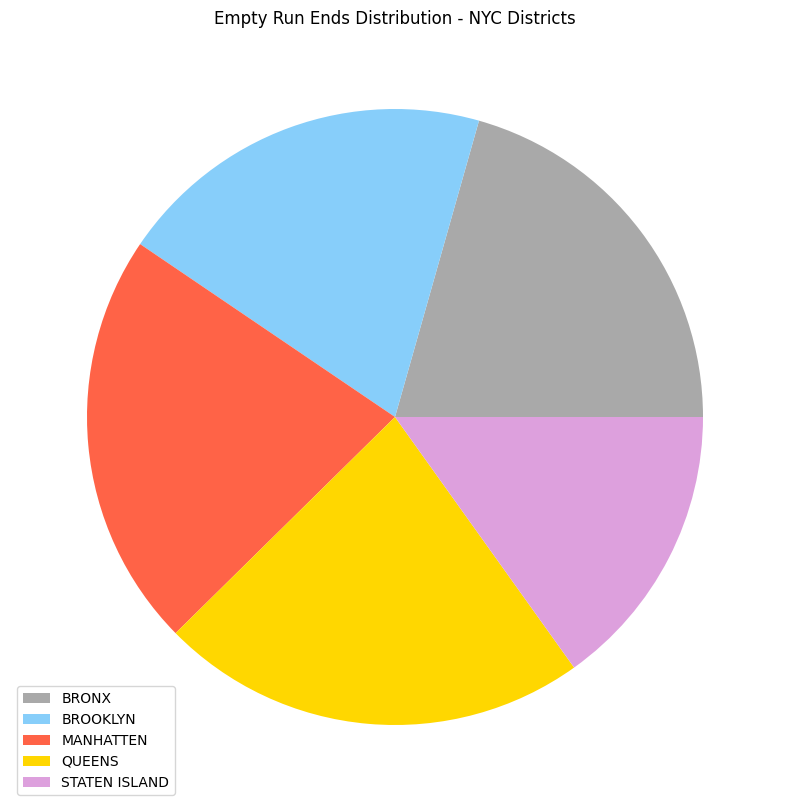

In [4]:
er_year_amounts = []
for month in setup.year:
    er_year_amounts.append(distrct_amounts(month, 'DOLocationID')) 
result_districts(er_district_amounts_percentages(sum_up(er_year_amounts)), er_year_amounts, 'Empty Run Ends Distribution - NYC Districts')

#### Distribution of empty runs with the end in Manhatten

In [5]:
er_year_manhatten = []
for month in setup.year: 
    er_year_manhatten.append(do_manhatten(month))
er_year_manhatten_percentages = []
for month in er_year_manhatten:
    er_year_manhatten_percentages.append(percentage(month))
er_manhatten_center = er_year_manhatten_percentages[0]
index = 1
for index in range(12):
    er_manhatten_center += er_year_manhatten_percentages[index]
result_manhatten(er_manhatten_center)

---------- Category 0 ----------
[] 

---------- Category 1 ----------
[4, 12, 13, 24, 41, 42, 43, 45, 48, 50, 68, 74, 75, 79, 87, 88, 90, 100, 107, 113, 114, 116, 120, 125, 127, 128, 137, 140, 141, 142, 143, 144, 148, 151, 152, 158, 161, 162, 163, 164, 166, 170, 186, 194, 202, 209, 211, 224, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 243, 244, 246, 249, 261, 262, 263] 

---------- Category 2 ----------
[] 

---------- Category 3 ----------
[] 

---------- Category 4 ----------
[] 



![](../assets/empty_do.jpg?raw=true)